In [2]:
cd /home/lansdell/projects/synthfeedback

/home/lansdell/projects/synthfeedback


In [3]:
%pylab inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


## Cartpole RNN with partial observability.

Only observe the position and angle -- requires integration over time to solve the problem

## Backprop

In [41]:
#Load BP results
sns.set_style('ticks')

lmbda = 5e-5
var_xi = 0.5
method = 'backprop'
learning_rate = 1e-3

#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

#tags = data['tags']
#metrics = data['metrics']

In [15]:
xs.shape

(5000, 10, 10, 20, 4)

In [42]:
b = 5
nB = 20
theta_d = xs[:,:,:,:,0].reshape(5000,-1, nB)
theta = xs[:,:,:,:,1].reshape(5000,-1,nB)
h_d = xs[:,:,:,:,2].reshape(5000,-1,nB)
h = xs[:,:,:,:,3].reshape(5000,-1,nB)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


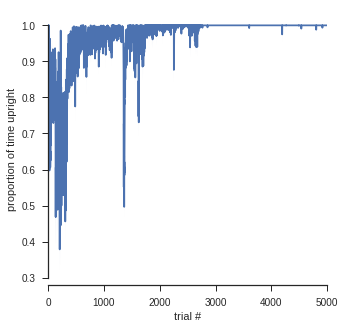

In [43]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
#sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)

## Feedback alignment

In [38]:
#Load BP results
sns.set_style('ticks')
lmbda = 5e-5
var_xi = 0.5
method = 'feedbackalignment'
learning_rate = 1e-3
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
xs = data['xs']
params = data['params']

In [21]:
xs.shape

(5000, 10, 10, 20, 4)

In [39]:
nB = 20
theta_d = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


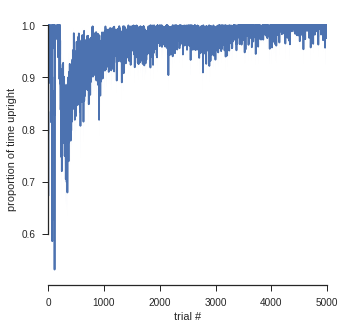

In [40]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)

## Node perturbation

In [47]:
#Load BP results
sns.set_style('ticks')
lmbda = 5e-5
var_xi = 0.01
method = 'nodepert'
learning_rate = 1e-3
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
xs = data['xs']
params = data['params']

In [48]:
xs.shape

(5000, 10, 10, 20, 4)

In [49]:
nB = 20
theta_d = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


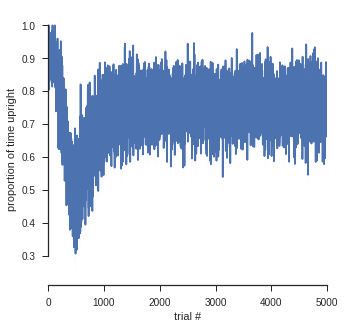

In [50]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)